# Some useful numerical methods

In this lecture we will go through the selection of numerical methods and tricks that may prove useful for our main task--i.e., computing equilibria in location choice models. The methods that are presented here are neither the fastest, the most efficient nor the most precise. Their main advantage is that they are simple and easy to implement. 

### Basic operations with vectors and matrices

Julia supports matrix multiplication. First, let's define the two matrices $A$ and $B$.

In [1]:
A = [1 2; 3 4]
B = [1 -1; 0 3];

Now we can calculate $C = AB$. The resulting matrix $C$ should be $C_{i,j} = A_{i,1}B_{1,j}+A_{i,2}B_{2,j}$.

In [2]:
C = A*B

2×2 Array{Int64,2}:
 1  5
 3  9

Matrix multiplication is useful to compute expected quadratic loss. Let us define a vector $V$ and calculate $w = \sum V^2_i = v^{\prime}v$.

In [83]:
V = [1; 2; 1; 5; 6]
w = V'*V

67

When computing the multiplication of the transposed matrix $V^{\prime}$ with $V$, one can ommit the multiplication sign *:

In [84]:
w = V'V

67

Consider two vectors $x,b$ and a matrix $A$ such that $$Ax = b.$$ If matrix $A$ is invertible, this system of linear equations has a solution $$x = A^{-1}b.$$ It is easy to find the solution in Julia:

In [85]:
b = [1;4]
x = A^(-1)*b

2-element Array{Float64,1}:
  1.9999999999999996
 -0.4999999999999998

Julia has a special syntax for this:

In [86]:
x = A\b

2-element Array{Float64,1}:
  2.0
 -0.5

### Finding a maximal element of an array

Let's define a matrix $A$.

In [87]:
A = rand(1:10,3,5)

3×5 Array{Int64,2}:
 4  7   8  1  2
 7  2   1  5  7
 6  6  10  2  3

If you need to find the largest (or the smallest) element of an array along some dimension you can do the following:

In [88]:
maximum(A, dims=1)

1×5 Array{Int64,2}:
 7  7  10  5  7

This was the maximal element along the first dimension (i.e., in each column). Now let us find the minimum along the second dimension (i.e., in each row).

In [89]:
minimum(A, dims=2)

3×1 Array{Int64,2}:
 1
 1
 2

If you need a maximum of several arguments, you can also use the function `max`:

In [90]:
max(1, 2, A[1,1])

4

Sometimes instead of a maximal value, you would need to find the location  (or an index) thereof. In that case: 

In [91]:
argmax(A, dims=2)

3×1 Array{CartesianIndex{2},2}:
 CartesianIndex(1, 3)
 CartesianIndex(2, 1)
 CartesianIndex(3, 3)

Finally, if you want to find both the maximal value and its location in the array you can do the following:

In [92]:
(maxvalue, maxvaluelocation) = findmax(A, dims=2)
println(maxvalue)
println(maxvaluelocation)

[8; 7; 10]
CartesianIndex{2}[CartesianIndex(1, 3); CartesianIndex(2, 1); CartesianIndex(3, 3)]


### Finding a maximum of a function using `optimize` from package `Optim`

To find a maximum (or a minimum) of a function you can use `optimize`. Before you do it, you need to install `Optim` package. You need to do it only once (that's why the installation part is commented here).

In [93]:
# using Pkg
# Pkg.add("Optim")
using Optim

Now let us define a function `f(x)` and plot it to get an idea how this function looks like

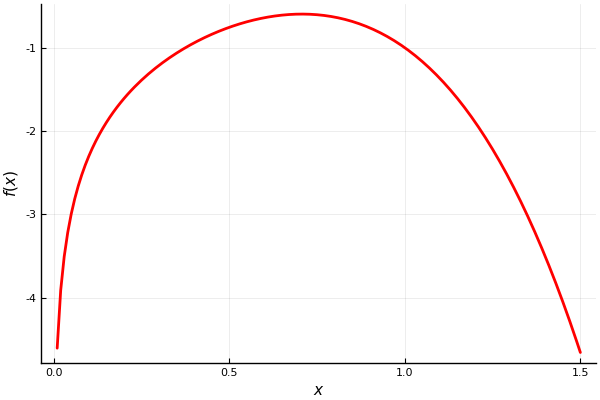

In [94]:
# using Pkg
# Pkg.add("Plots")
using Plots
pyplot()
# using Pkg
# Pkg.add("LaTeXStrings")
using LaTeXStrings

function f(x)
log(x)-x^4
end;
xx = [ii/100 for ii in 1:150]

plot(xx, f.(xx),
        seriestype = :line,
        linestyle = :solid,
        linealpha = 1,
        linewidth = 2,
        linecolor = :red,
        label = "")
xlabel!(L"x")
ylabel!(L"f(x)")

You can see that the maximizer of this function is somewhere around 0.75 and the maximum of the function is around -1. 

To maximize the function we can use function `optimize`. This function looks for a minimum, so we will apply it to `-f(x)` to find a maximum (in doing so we will create an anonymous function `x -> -f(x)`) 

In [95]:
f_min = optimize(x -> -f(x),0,2)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.000000, 2.000000]
 * Minimizer: 7.071068e-01
 * Minimum: 5.965736e-01
 * Iterations: 10
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 11

Function `optimize` returns a lot of information, some of it useful for our purposes and some of it auxilliary (e.g. whether the algorithm that was looking for a minimum converged). We can access this information directly

In [96]:
Optim.minimizer(f_min)

0.7071067801731484

In [97]:
-Optim.minimum(f_min)

-0.5965735902799727

We can plot the maximum

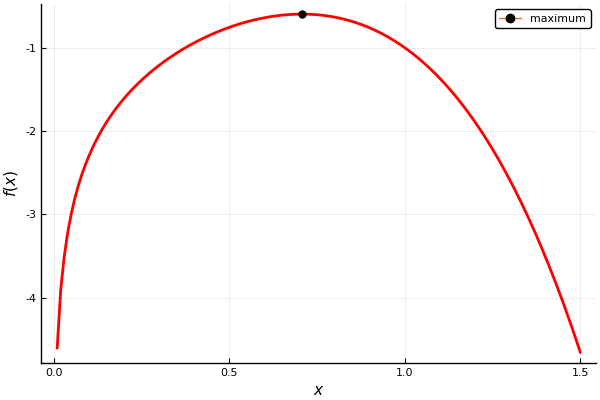

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [98]:
plot(xx, f.(xx),
        seriestype = :line,
        linestyle = :solid,
        linealpha = 1,
        linewidth = 2,
        linecolor = :red,
        label = "")
xlabel!(L"x")
ylabel!(L"f(x)")
plot!([Optim.minimizer(f_min)],[-Optim.minimum(f_min)],
        markershape = :circle,
        markersize = 3,
        markeralpha =1,
        markercolor = :black,        
        markerstrokewidth = 3,
        markerstrokealpha = 1,
        markerstrokecolor = :black,
        markerstrokestyle = :solid,
        label = "maximum"
)

### Solving an equation

There are several ways to solve an equation numerically. One way is to use special packages that solve equations (just like a package `Optim` maximizes functions). The other way is to create your own solver.

#### Using minimization

Suppose you are trying to solve an equation $g(x) = 0$. The solution to this equation will coincide with the minimum of a function $g(x)^2$, so you can use `optimize` to find the solution. Here is the example

In [99]:
function g(x)
    5-x^2
    end

g2_min = optimize(x -> g(x)^2, 0, 5)
x_solution=Optim.minimizer(g2_min)

2.23606797817201

To check that this is a solution, let us calculate the function $g(x)$ at this value

In [100]:
g(x_solution)

-3.0062601297231595e-9

#### Binary search 

If function $g(x)$ is monotone, than one can use binary search to find a solution to $g(x) = 0$. This is useful for us because excess demand is usually decreasing in price. Suppose for concreteness that the function $g(x)$ is decreasing To implement this we need to find two numbers $\underline{x}$ and $\overline{x}$ that are such that $g(\underline{x})>0$ and $g(\overline{x})<0$. Then we calculate the mid point between the two numbers and check whether the function is negative or positive at the midpoint. If $g\left(\frac{\underline{x}+\overline{x}}{2}\right)>0$ then we replace $\underline{x}$ with the midpoint. Otherwise we replace $\overline{x}$ with the midpoint. We repeat this procedure until the value at the midpoint is close enough to zero. 

In [101]:
tolerance_g = 0.00001 #this is how close to zero I want my g(x) to be
#initial conditions for the interval and its midpoint
xl = 0 
xh = 5
xm = (xl+xh)/2

#iterations
while abs(g(xm))>tolerance_g
    if g(xm)>0
            xl = xm
        else
            xh = xm
        end
    xm = (xl+xh)/2
end
    
xm

2.2360658645629883

### Approximating an integral

#### Sum on a grid

Suppose we want to compute the following integral $$\int\limits_{a}^{b} f(x)dx.$$ We can approximate it with a sum $$\sum\limits_{i = 1}^{n} f(x_i)\Delta,$$ where $x_0 = a$, $x_i = x_0+i\Delta$, and $\Delta = \frac{b-a}{n}$. Note, that $x_n = b$. 

The large the $n$, the better the more precise is the approximation.

Suppose $a = 1$, $b = 2$ and $f(x) = \ln x - x^4$. First, let us define a sequence $x_i$ as an array.

In [102]:
n = 10000; a = 1; b = 2;
delta = (b-a)/n
xi = [1+ii*delta for ii in 1:n];

Now we can compute $f(x_i)\Delta$ and sum them up

In [103]:
sum(f.(xi)*delta, dims = 1)

1-element Array{Float64,1}:
 -5.8144210052710825

#### Monte Carlo

An alternative to a deterministic grid is the random one. Observe that $$\int\limits_{a}^{b} f(x)dx = (b-a)\int\limits_{a}^{b} f(x)\frac{1}{b-a}dx = (b-a)\mathbb{E}[f(z)],$$
where $z$ is a uniform random variable on $[a,b]$. One way to estimate the expectation is to generate large sample of draws from the random variable $z$ and compute the average of $f(z)$.

In [104]:
z_sample = (b-a)*rand(n,1).+a
(b-a)*sum(f.(z_sample), dims = 1)/n

1×1 Array{Float64,2}:
 -5.819287161051755

### Approximating a derivative 

Similarly to the integral, we can compute an approximation for a derivative using $$\frac{df(x)}{dx}\approx \frac{f(x+\varepsilon)-f(x)}{\varepsilon}$$ for small enough $\varepsilon$.

In [105]:
function derivativeoffunction(func::Function, x_arg, precision)
    (func(x_arg+precision)-func(x_arg))/precision
end

derivativeoffunction(x -> x^2, 1, 0.0001)

2.000099999999172